# **Supervised Classification Algorithms**


**Dataset** - Breast Cancer (Sklearn Toy Dataset)


**Supervised Classification Algorithms covered in this notebook:-**
1. Support Vector Classifier (Linear Kernel)
2. SVC after PCA
3. K Nearest Neighbour (KNN)
4. Random Forest Classifier
5. Decision Tree Classifier
6. Support Vector Classifier (RBF Kernel)
7. Naive Bayes (GaussianNB)
8. Logistic Regression

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

In [0]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

# Standardize features by removing the mean and scaling to unit variance
X = StandardScaler().fit_transform(X)

print("\nFeatures: ",cancer.feature_names)

print("\nNumber of Features: ", str(len(cancer.feature_names)))

print("\nLabels: ",cancer.target_names)

print("\nShape: ",cancer.data.shape)

print("\nFirst Five:-\n",cancer.data[0:5])

print("\nTarget:-\n",cancer.target)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Number of Features:  30

Labels:  ['malignant' 'benign']

Shape:  (569, 30)

First Five:-
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+0

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  0.9649122807017544
Precision:  0.9722222222222222
Recall:  0.9722222222222222


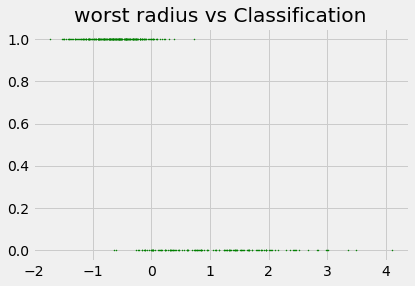

In [0]:
# MODEL 1 - SVC (Linear)

model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

dfx = pd.DataFrame(X_train)
dfy = pd.DataFrame(y_train)
plt.style.use('fivethirtyeight')
feature_index = 20
plt.scatter(dfx[feature_index], dfy, color = "green", s = 1, label = 'Train data')
graph_title = cancer.feature_names[feature_index] + " vs Classification"
plt.title(graph_title)
plt.show()


Shape before PCA -  (398, 30)

Shape after PCA -  (398, 10)
Accuracy:  0.9824561403508771
Precision:  0.981651376146789
Recall:  0.9907407407407407


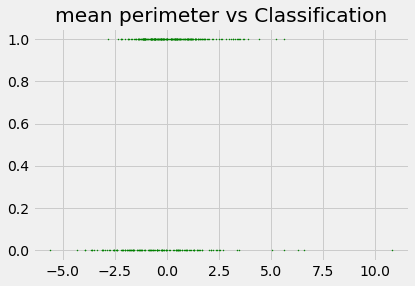

In [0]:
# MODEL 2 - SVC (Linear) after PCA
# At the end of this model test_train_split is run again for convenience

pca = PCA(.95)
pca.fit(X_train)

print("\nShape before PCA - ",X_train.shape)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print("\nShape after PCA - ",X_train.shape)

model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

dfx = pd.DataFrame(X_train)
dfy = pd.DataFrame(y_train)
plt.style.use('fivethirtyeight')
feature_index = 2
plt.scatter(dfx[feature_index], dfy, color = "green", s = 1, label = 'Train data')
graph_title = cancer.feature_names[feature_index] + " vs Classification"
plt.title(graph_title)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy:  0.9532163742690059
Precision:  0.9464285714285714
Recall:  0.9814814814814815


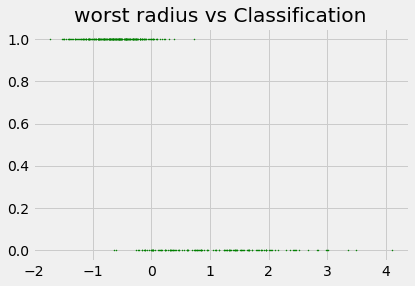

In [0]:
# MODEL 3 - K Nearest Neighbour (KNN)

# Tips and Tricks
# 1) Choose an odd K value for a 2 Class Problem
# 2) Must Not be a multiple of the number of classes

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

dfx = pd.DataFrame(X_train)
dfy = pd.DataFrame(y_train)
plt.style.use('fivethirtyeight')
feature_index = 20
plt.scatter(dfx[feature_index], dfy, color = "green", s = 1, label = 'Train data')
graph_title = cancer.feature_names[feature_index] + " vs Classification"
plt.title(graph_title)
plt.show()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
Accuracy:  0.9239766081871345
Precision:  0.9357798165137615
Recall:  0.9444444444444444


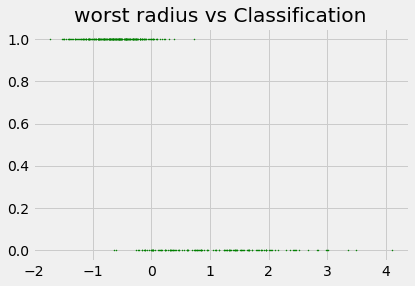

In [0]:
# MODEL 4 - Random Forest Classifier

# To learn more about the Parameter Tuning of this algo, visit the link below
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

dfx = pd.DataFrame(X_train)
dfy = pd.DataFrame(y_train)
plt.style.use('fivethirtyeight')
feature_index = 20
plt.scatter(dfx[feature_index], dfy, color = "green", s = 1, label = 'Train data')
graph_title = cancer.feature_names[feature_index] + " vs Classification"
plt.title(graph_title)
plt.show()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
Accuracy:  0.9473684210526315
Precision:  0.9459459459459459
Recall:  0.9722222222222222


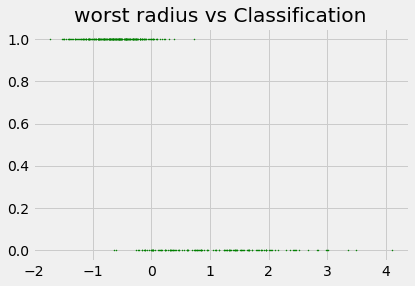

In [0]:
# MODEL 5 - Decision Tree Classifier

# To learn more about the Parameter Tuning of this algo, visit the link below
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

dfx = pd.DataFrame(X_train)
dfy = pd.DataFrame(y_train)
plt.style.use('fivethirtyeight')
feature_index = 20
plt.scatter(dfx[feature_index], dfy, color = "green", s = 1, label = 'Train data')
graph_title = cancer.feature_names[feature_index] + " vs Classification"
plt.title(graph_title)
plt.show()

Accuracy:  0.9649122807017544
Precision:  0.9722222222222222
Recall:  0.9722222222222222


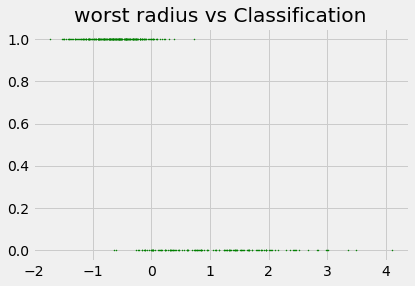

In [0]:
# MODEL 6 - SVC (rbf Kernel)

model = svm.SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

dfx = pd.DataFrame(X_train)
dfy = pd.DataFrame(y_train)
plt.style.use('fivethirtyeight')
feature_index = 20
plt.scatter(dfx[feature_index], dfy, color = "green", s = 1, label = 'Train data')
graph_title = cancer.feature_names[feature_index] + " vs Classification"
plt.title(graph_title)
plt.show()

Accuracy:  0.935672514619883
Precision:  0.9532710280373832
Recall:  0.9444444444444444


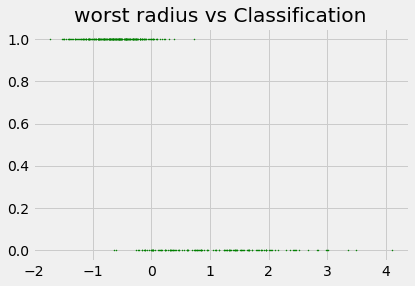

In [59]:
# MODEL 7 - Naive Bayes (Gaussian Kernel)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

dfx = pd.DataFrame(X_train)
dfy = pd.DataFrame(y_train)
plt.style.use('fivethirtyeight')
feature_index = 20
plt.scatter(dfx[feature_index], dfy, color = "green", s = 1, label = 'Train data')
graph_title = cancer.feature_names[feature_index] + " vs Classification"
plt.title(graph_title)
plt.show()

Accuracy:  0.9707602339181286
Precision:  0.9813084112149533
Recall:  0.9722222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


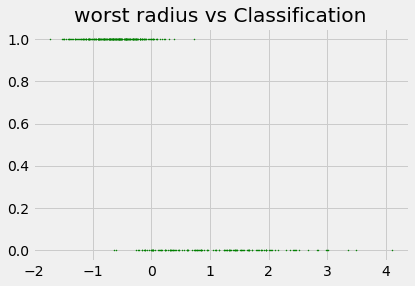

In [60]:
# MODEL 8 - Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

dfx = pd.DataFrame(X_train)
dfy = pd.DataFrame(y_train)
plt.style.use('fivethirtyeight')
feature_index = 20
plt.scatter(dfx[feature_index], dfy, color = "green", s = 1, label = 'Train data')
graph_title = cancer.feature_names[feature_index] + " vs Classification"
plt.title(graph_title)
plt.show()

Graph 1


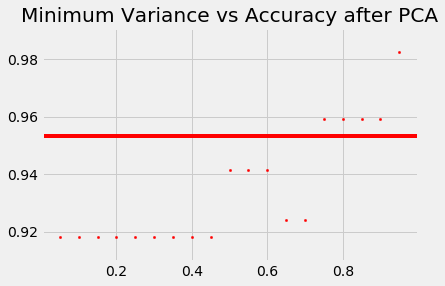




Graph 2


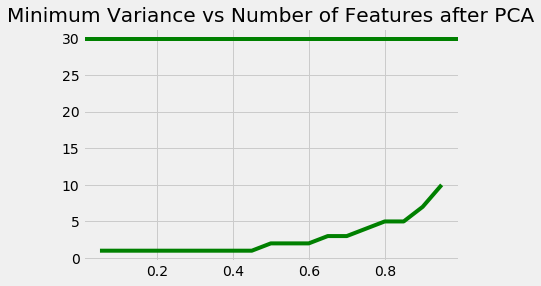

In [0]:
# Show the effect of PCA on SVM

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

counter_pca = []
features_after_pca = []
accuracy_after_pca = []

# Store the Accuracy without PCA
model1 = svm.SVC(kernel='linear')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
model1_accuracy = metrics.accuracy_score(y_test, y_pred)

#For the sake of simplicity, additional variables related to pca are defined
for counter in range(19):
  
  i = (counter+1)/20

  pca = PCA(i)
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  model2 = svm.SVC(kernel='linear')
  model2.fit(X_train_pca, y_train)
  y_pred_pca = model2.predict(X_test_pca)

  counter_pca.append(i)
  features_after_pca.append(X_train_pca.shape[1])
  accuracy_after_pca.append(metrics.accuracy_score(y_test, y_pred_pca))

print("Graph 1")

plt.scatter(counter_pca, accuracy_after_pca,s=5, color = "red", label = 'Number of Features')
plt.axhline(y=model1_accuracy, color='r', linestyle='-')
plt.title("Minimum Variance vs Accuracy after PCA")
plt.show()

print("\n\n\nGraph 2")

plt.plot(counter_pca, features_after_pca, color = "green", label = 'Features Number')
plt.axhline(y=30, color='g', linestyle='-')
plt.title("Minimum Variance vs Number of Features after PCA")
plt.show()

Graph 1


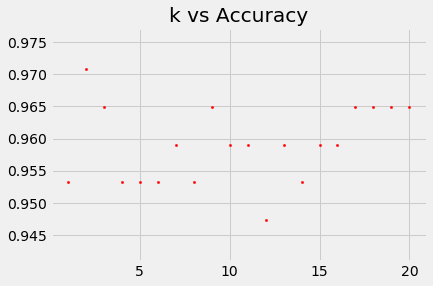

In [0]:
# KNN accuracy vs k

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

k = []
accuracy_knn = []

for counter in range(1,21,1):

  model = KNeighborsClassifier(n_neighbors=counter)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  k.append(counter)
  accuracy_knn.append(metrics.accuracy_score(y_test, y_pred))

print("Graph 1")

plt.scatter(k, accuracy_knn,s=5, color = "red", label = 'Accuracy')
plt.title("k vs Accuracy")
plt.show()